In [1]:
import socket
import matplotlib.pyplot as plt
import numpy as np
import cv2
import random

In [2]:
def get_tetris_server_response(sock):
    is_game_over = (sock.recv(1) == b'\x01')
    removed_lines = int.from_bytes(sock.recv(4), 'big')
    height = int.from_bytes(sock.recv(4), 'big')
    holes = int.from_bytes(sock.recv(4), 'big')
    img_size = int.from_bytes(sock.recv(4), 'big')
    img_png = sock.recv(img_size)
    
    nparr = np.frombuffer(img_png, np.uint8)
    np_image = cv2.imdecode(nparr, -1)
    
    return is_game_over, removed_lines, height, holes, np_image

In [3]:
HOST = "127.0.0.1"  
PORT = 10612 

sock = socket.socket(socket.AF_INET, socket.SOCK_STREAM)
sock.connect((HOST, PORT))
    

In [4]:
sock.sendall(b"start\n")
is_game_over, removed_lines, height, holes, screen_img = get_tetris_server_response(sock)

In [5]:
print(type(screen_img))
screen_img.shape

<class 'numpy.ndarray'>


(200, 100, 3)

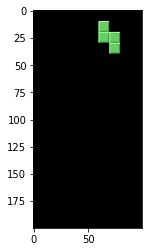

In [6]:
%matplotlib inline 
plt.imshow(screen_img)

In [7]:
sock.sendall(b"move -1\n")
is_game_over, removed_lines, height, holes, screen_img = get_tetris_server_response(sock)

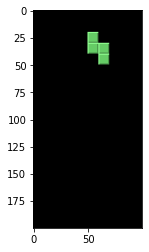

In [8]:
%matplotlib inline 
plt.imshow(screen_img)

In [9]:
sock.sendall(b"drop\n")
is_game_over, removed_lines, height, holes, screen_img = get_tetris_server_response(sock)

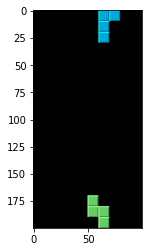

In [10]:
%matplotlib inline 
plt.imshow(screen_img)

In [11]:
print('Lines: ', removed_lines, '  Height: ', height, '  Holes: ', holes)

Lines:  0   Height:  3   Holes:  1


In [12]:
sock.sendall(b"rotate 0\n")
is_game_over, removed_lines, height, holes, screen_img = get_tetris_server_response(sock)

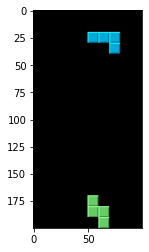

In [13]:
%matplotlib inline 
plt.imshow(screen_img)

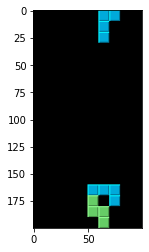

In [14]:
sock.sendall(b"drop\n")
is_game_over, removed_lines, height, holes, screen_img = get_tetris_server_response(sock)
%matplotlib inline 
plt.imshow(screen_img)

Random play test: Steps 41, lines 0


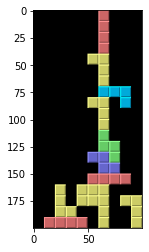

In [15]:
sock.sendall(b"start\n")
is_game_over, removed_lines, height, holes, screen_img = get_tetris_server_response(sock)

steps = 0
while is_game_over == False:
    action_id = random.randint(0, 4)
    
    if action_id == 0:
        action_cmd = b'move -1\n'
    elif action_id == 1:
        action_cmd = b'move 1\n'
    elif action_id == 2:
        action_cmd = b'rotate 0\n'
    elif action_id == 3:
        action_cmd = b'rotate 1\n'
    else:
        action_cmd = b'drop\n'
        
    steps = steps + 1
    sock.sendall(action_cmd)
    is_game_over, removed_lines, height, holes, screen_img = get_tetris_server_response(sock)

print(f"Random play test: Steps {steps}, lines {removed_lines}")

%matplotlib inline 
plt.imshow(screen_img)

In [16]:
print('Lines: ', removed_lines, '  Height: ', height, '  Holes: ', holes)

Lines:  0   Height:  20   Holes:  28


## Note! Due to request-response pattern, server will upadate automatically per client request.
## Therefore, new_piece command will drop down current piece and create new piece later


In [17]:
sock.sendall(b"start\n")

In [18]:
for y in [0,1]:
    for x in range(-6, 6, 2):

        sock.sendall(b"new_piece 5\n")
        is_game_over, removed_lines, height, holes, screen_img = get_tetris_server_response(sock)

        cv2.imshow("Image", screen_img)
        cv2.waitKey(500)

        cmd = "move " + str(x) + "\n"
        sock.sendall(cmd.encode('utf-8'))
        is_game_over, removed_lines, height, holes, screen_img = get_tetris_server_response(sock)

        cv2.imshow("Image", screen_img)
        cv2.waitKey(500)

        #sock.sendall(b"drop\n")
        #is_game_over, removed_lines, screen_img = get_tetris_server_response(sock)
    

print(f"Total removed lines: {removed_lines}")
cv2.destroyAllWindows()

Total removed lines: 2


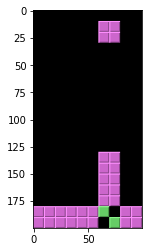

In [19]:
%matplotlib inline 
plt.imshow(screen_img)

In [20]:
print('Lines: ', removed_lines, '  Height: ', height, '  Holes: ', holes)

Lines:  2   Height:  7   Holes:  2
